In [1]:
# Let's Load the Automobile Price data set first
#To do so I'll import the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
%matplotlib inline


def read_auto_data(fileName = "C:/Users/Abhishek Nagrecha/Desktop/Data_visualization/Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 


    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

In [2]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#first step in making a bar plot is to compute the counts
counts = auto_prices['make'].value_counts() # find the counts for each unique category
counts

toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

Text(0, 0.5, 'Number of autos')

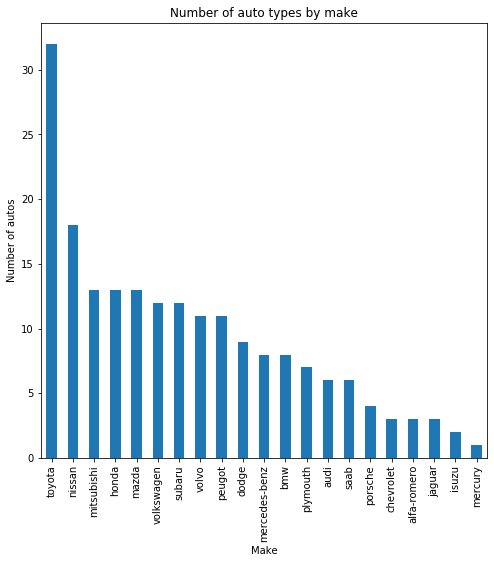

In [4]:
#Plotting this is similar to scatter plots
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define the axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of auto types by make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

#its very well observed that more exclusive companies make fewer

# Histograms

Text(0, 0.5, 'Number of autos')

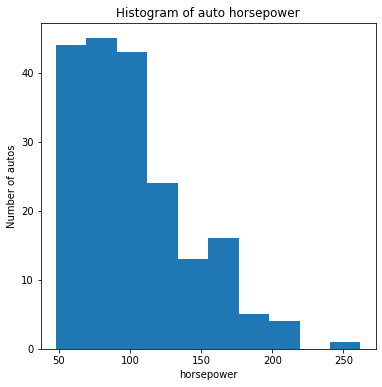

In [5]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
auto_prices['horsepower'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto horsepower') # Give the plot a main title
ax.set_xlabel('horsepower') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

Text(0, 0.5, 'Number of autos')

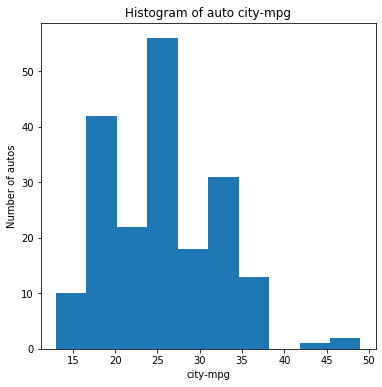

In [6]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
auto_prices['city-mpg'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto city-mpg') # Give the plot a main title
ax.set_xlabel('city-mpg') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

#it can be very well observed that Maximum autos ahve a city-mpg of around 25

Text(0, 0.5, 'Number of autos')

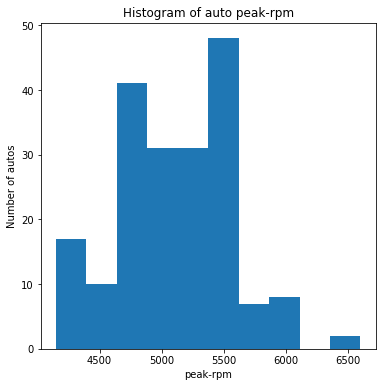

In [7]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
auto_prices['peak-rpm'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto peak-rpm') # Give the plot a main title
ax.set_xlabel('peak-rpm') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

#its clearly observable that peak-rpm of maximum vehicles lies between 4750-5500 rpm

Text(0, 0.5, 'Number of autos')

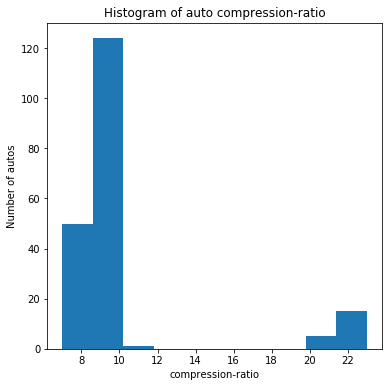

In [8]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
auto_prices['compression-ratio'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto compression-ratio') # Give the plot a main title
ax.set_xlabel('compression-ratio') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

#its easy to determine that maximum autos have compression ratio between 8-10

Text(0, 0.5, 'Number of autos')

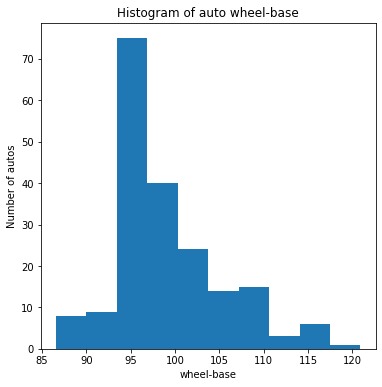

In [9]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
auto_prices['wheel-base'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto wheel-base') # Give the plot a main title
ax.set_xlabel('wheel-base') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

#its easy to determine that maximum autos have wheel-base of 95

Text(0, 0.5, 'Number of autos')

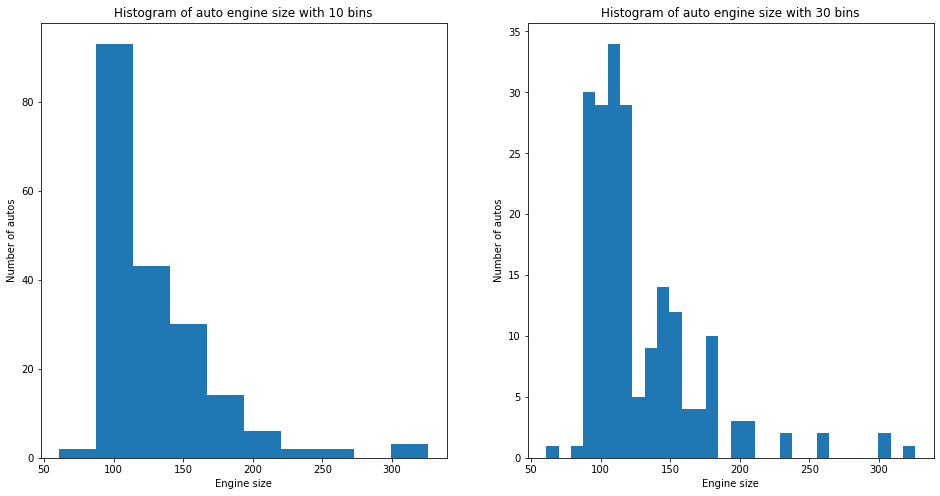

In [16]:
#additional aesthetics 

fig, ax = plt.subplots(1, 2, figsize = (16, 8))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins') # Give the plot a main title
ax[0].set_xlabel('Engine size') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 30) 
ax[1].set_title('Histogram of auto engine size with 30 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

Text(0, 0.5, 'Number of autos')

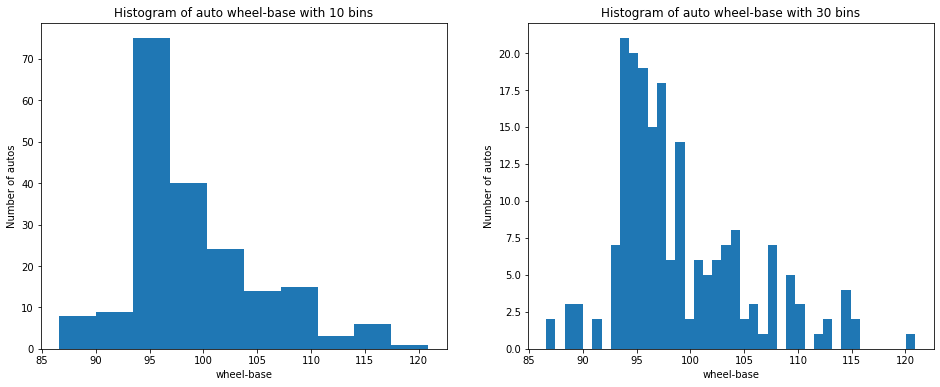

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['wheel-base'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto wheel-base with 10 bins') # Give the plot a main title
ax[0].set_xlabel('wheel-base') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['wheel-base'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of auto wheel-base with 30 bins') 
ax[1].set_xlabel('wheel-base') 
ax[1].set_ylabel('Number of autos')

#its clear that the bin size of 30 is more detailed when compared to bin size of 10

Text(0, 0.5, 'Number of autos')

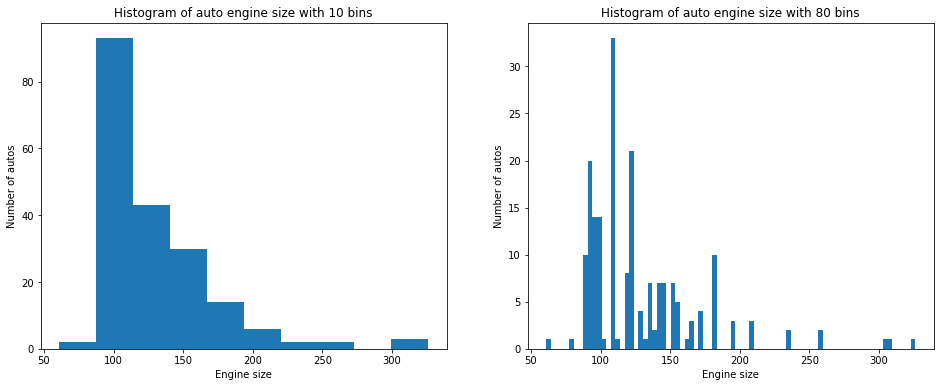

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins') # Give the plot a main title
ax[0].set_xlabel('Engine size') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 80) 
ax[1].set_title('Histogram of auto engine size with 80 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

# Box-plots

Text(0, 0.5, 'Engine size')

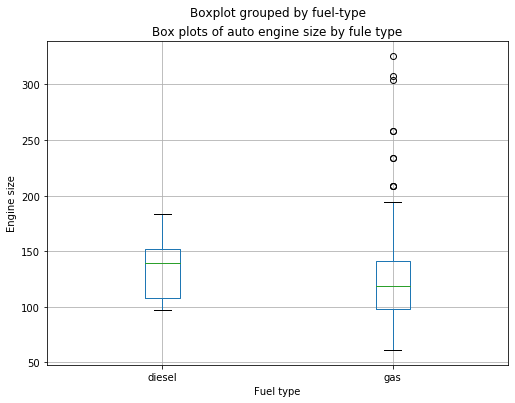

In [10]:
fig = plt.figure(figsize=(8,6)) # Here I define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

#its observable that there are few outliers in fuel-type = gas

Text(0, 0.5, 'Engine size')

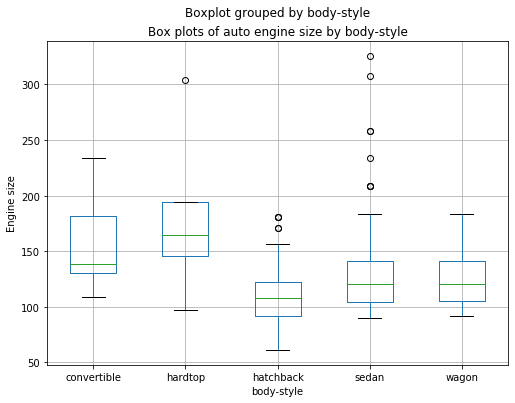

In [11]:
fig = plt.figure(figsize=(8,6)) # Here I define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','body-style']].boxplot(by = 'body-style', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by body-style') # Give the plot a main title
ax.set_xlabel('body-style') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

#Here we observe many outliers in sedan body-style

Text(0, 0.5, 'Engine size')

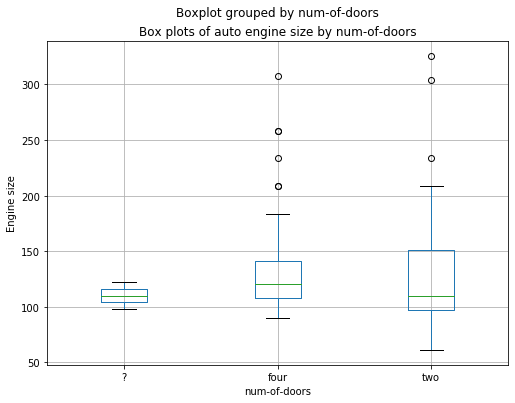

In [12]:
fig = plt.figure(figsize=(8,6)) # Here I define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','num-of-doors']].boxplot(by = 'num-of-doors', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by num-of-doors') # Give the plot a main title
ax.set_xlabel('num-of-doors') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

#Here we observe many outliers in 4 num-of-doors

Text(0, 0.5, 'horsepower')

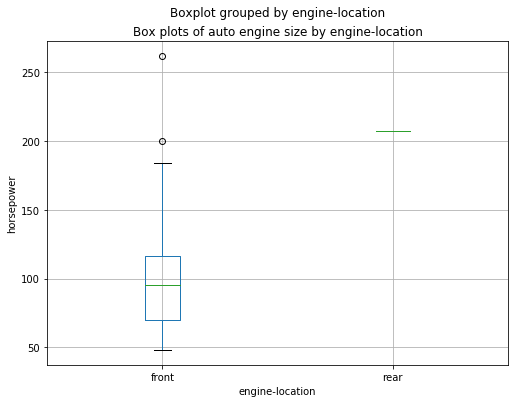

In [13]:
fig = plt.figure(figsize=(8,6)) # Here I define plot area
ax = fig.gca() # define axis    
auto_prices[['horsepower','engine-location']].boxplot(by = 'engine-location', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by engine-location') # Give the plot a main title
ax.set_xlabel('engine-location') # Set text for the x axis
ax.set_ylabel('horsepower')# Set text for y axis


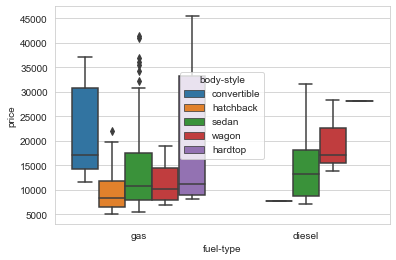

In [20]:
sns.set_style("whitegrid")
sns.boxplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="body-style")eble 

#its noticeble that, Gas hardtops have the widest range of price, followed by gas convertibles.
#There are few available body styles for diesel cars.
#Gas hatchbacks are generally the lowest cost cars, follow by gas and diesel sedans.